<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 1

### Problem 0 (3 points)

## Part 1: Polynomial Fitting 

In [2]:
import numpy as np
from itertools import combinations_with_replacement as combos


def monomials(d, k):
    c = np.array(list(combos(range(d + 1), k)))
    m = np.zeros((c.shape[0], d))
    for j in range(d):
        m[:, j] = np.sum(c == j, axis=1)
    order = np.argsort(np.sum(m, axis=1))
    return m[order]

### Problem 1.1 (Exam Style Except for the Code)

### Problem 1.2

In [ ]:
x = np.array([0.5, -0.2, 0.1])
d, k = len(x), 2

### Problem 1.3 (Exam Style if Table is Provided)

In [ ]:
c = np.linspace(2, 0, 35)

### Problem 1.4

### Problem 1.5

In [ ]:
n_train = 100
a, b = 2., 3.
sigma = 0.2
x_train = np.sort(np.random.rand(n_train))
noise = sigma * np.random.randn(n_train)
y_train = a + b * x_train + noise
x_train = np.expand_dims(x_train, axis=1)

### Problem 1.6

In [ ]:
def eigen_data(n):
    X = np.random.randn(n, 3)
    matrices = np.reshape(X[:, [0, 1, 1, 2]], (n, 2, 2))
    y = np.array([np.max(np.linalg.eig(matrix)[0]) for matrix in matrices])
    return X, y

In [ ]:
n_train, n_test = 100, 100
x_train, y_train = eigen_data(n_train)
x_test, y_test = eigen_data(n_test)

### Problem 1.7 (Exam Style)

## Part 2: Points in Many Dimensions

In [3]:
from math import gamma, sqrt
from matplotlib import pyplot as plt

def gaussian_sample(n, d):
    mean = np.zeros(d)
    mean_distance = 2 * gamma((d + 1) / 2) / gamma(d / 2) if d < 200 else sqrt(2 * d)
    covariance = np.eye(d) / pow(mean_distance, 2)
    return np.random.multivariate_normal(mean, covariance, size=n)

In [4]:
def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

### Problem 2.1

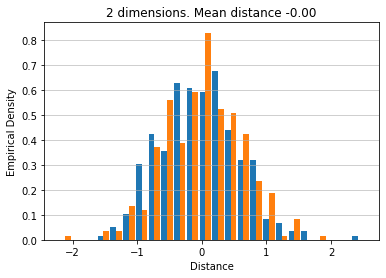

In [5]:
def distances(points):
    euc_distances = []
    for point1 in range(len(points)):
        # prevents zero distance between a point and itself from being included
        for point2 in range(point1+1, len(points)):
            # calculating euclidiean distance
            euc_distances.append(np.sqrt(np.sum(np.square(points[point1]-points[point2]))))
    return euc_distances              
    
# generating histogram from a Gaussian distribution of 300 points in 2 dimensions
test_points = gaussian_sample(300, 2)   
dist = distances(test_points)
show_histogram(test_points, 2)

### Problem 2.2

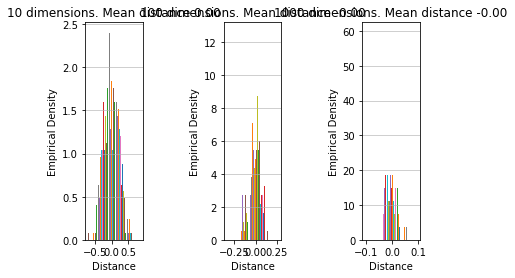

In [9]:
# this cell takes awhile to run (especially 1000)!

test_points_10 = gaussian_sample(300, 10)
dist_10 = distances(test_points_10)

test_points_100 = gaussian_sample(300, 100)
dist_100 = distances(test_points_100)

test_points_1000 = gaussian_sample(300, 1000)
dist_1000 = distances(test_points_1000)


plt.subplot(1, 5, 1)
show_histogram(test_points_10, 10)

plt.subplot(1, 5, 3)
show_histogram(test_points_100, 100)

plt.subplot(1, 5, 5)
show_histogram(test_points_1000, 1000)

### Problem 2.3

### Problem 2.4